In [1]:
!pip install ipykernel

In [3]:
!pip install pymysql

In [5]:
import pymysql

In [7]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [9]:
db = pymysql.connect(host='localhost', user='root',password='Matilda97',database='hr')

In [11]:
mycursor = db.cursor()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Task 1: sql query to extract country names and the region associated with them
country=pd.read_sql_query('select c.country_name as Country,r.region_name as Continent from regions r join countries c on c.region_id=r.region_id',db)
country

,Country,Continent
0,Belgium,Europe
1,Switzerland,Europe
2,Germany,Europe
3,Denmark,Europe
4,France,Europe
5,Italy,Europe
6,Netherlands,Europe
7,United Kingdom,Europe
8,Argentina,Americas
9,Brazil,Americas


In [19]:
# Task 2: display table using join & pushed back to Rdbms; country wise employee count
cntry_cnt=pd.read_sql_query('''select c.country_name as Country, count(e.employee_id) as employee_count from countries c join locations l join departments d join employees e
on c.country_id=l.country_id and l.location_id=d.location_id and d.department_id=e.department_id group by c.country_name''',db)
cntry_cnt

,Country,employee_count
0,United States of America,68
1,Canada,2
2,United Kingdom,35
3,Germany,1


In [21]:
from sqlalchemy import create_engine

In [23]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host='localhost', db='hr', user='root', pw='Matilda97'))

In [27]:
#push data frame as table into hr database
cntry_cnt.to_sql('country_wise_emp_count',engine,index=False)

4

In [29]:
#Task 3: dispay pushed table
emp_count=pd.read_sql_query('select * from country_wise_emp_count',engine)
emp_count

,Country,employee_count
0,United States of America,68
1,Canada,2
2,United Kingdom,35
3,Germany,1


In [31]:
import matplotlib.pyplot as plt

In [33]:
emp_cnt1=emp_count.sort_values('employee_count',ascending=False)
emp_cnt1

,Country,employee_count
0,United States of America,68
2,United Kingdom,35
1,Canada,2
3,Germany,1


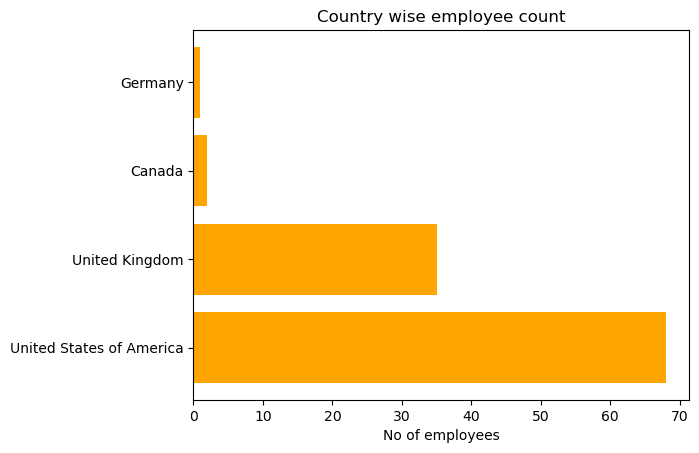

In [35]:
# graphical representation using matplotlib
plt.barh(emp_cnt1['Country'],emp_cnt1['employee_count'],color='orange')
plt.title('Country wise employee count')
plt.xlabel('No of employees')
plt.show()